# SHAP Tutorial 
<br>
Applying and interpreting the Python SHAP Package 
<br>
Dataset: https://archive.ics.uci.edu/ml/datasets/Abalone

In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

path = "/Users/conorosully/Google Drive/My Drive/Medium/SHAP Tutorial/Figures/{}"

## Dataset

In [5]:
#import dataset
data = pd.read_csv("../data/abalone.data",
                  names=["sex","length","diameter","height","whole weight",
                         "shucked weight","viscera weight","shell weight","rings"])

y = data['rings']
X = data.drop('rings', axis=1)

print(len(data))
data.head()

4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data Exploration

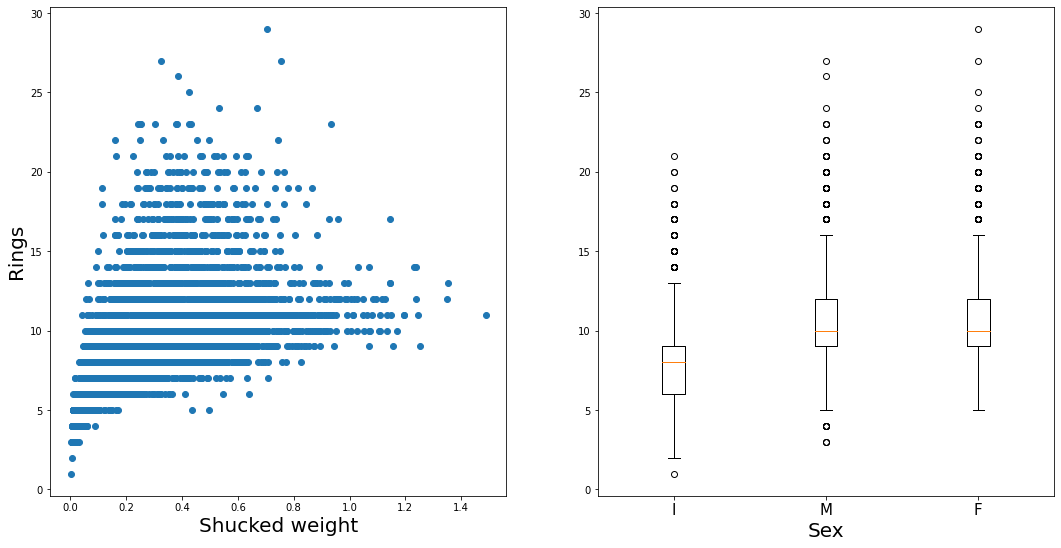

In [7]:
plt.figure(figsize=(18, 9))

#Plot 1
plt.subplot(121)
plt.scatter(data['shucked weight'],data['rings'])

plt.ylabel('Rings',size=20)
plt.xlabel('Shucked weight',size=20)

#Plot 2
plt.subplot(122)
plt.boxplot(data[data.sex=='I']['rings'],positions=[1])
plt.boxplot(data[data.sex=='M']['rings'],positions=[2])
plt.boxplot(data[data.sex=='F']['rings'],positions=[3]) 

plt.xticks(ticks=[1,2,3],labels=['I', 'M', 'F'],size= 15)
plt.xlabel('Sex',size=20)

plt.savefig(path.format('data_exploration.png'),dpi=200,bbox_inches='tight', facecolor='white')

## Feature Engineering

In [8]:
#Create dummy variables
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)

X.head()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1


## Train Model

In [9]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror") 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

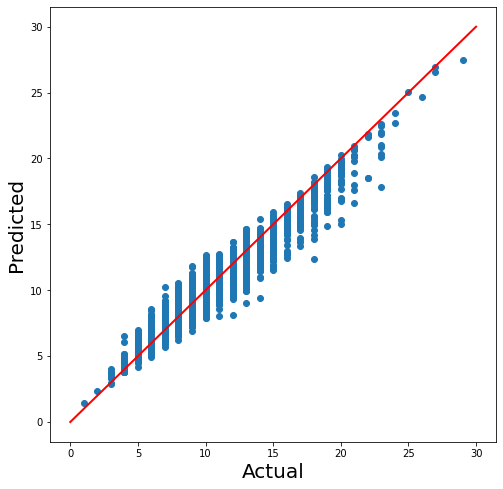

In [10]:
#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 30], [0, 30], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

plt.savefig(path.format('regression_evaluation.png'),dpi=200,bbox_inches='tight', facecolor='white')

# SHAP

In [11]:
#Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

print(np.shape(shap_values))
print(type(shap_values))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


(4177, 10)
<class 'shap._explanation.Explanation'>


### Force Plots

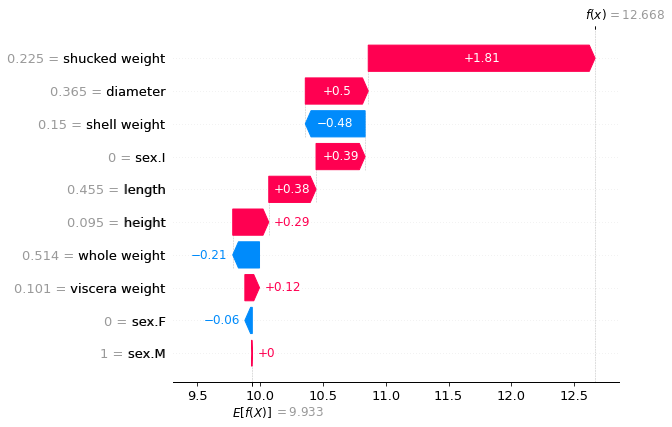

In [12]:
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [13]:
np.mean(y)

9.933684462532918

In [102]:
shap_values[0]

.values =
array([-0.02202971, -0.1735851 ,  0.7422258 , -0.5780224 ,  1.2595152 ,
       -0.14913584, -0.9265836 ,  0.3477095 , -0.05469596,  0.33036095],
      dtype=float32)

.base_values =
-0.79401016

.data =
array([0.455 , 0.365 , 0.095 , 0.514 , 0.2245, 0.101 , 0.15  , 1.    ,
       0.    , 0.    ])

In [11]:
# Waterfall plot for first observation
shap.plots.force(shap_values[0])

In [12]:
shap.plots.force(shap_values[0:100])

## Mean SHAP

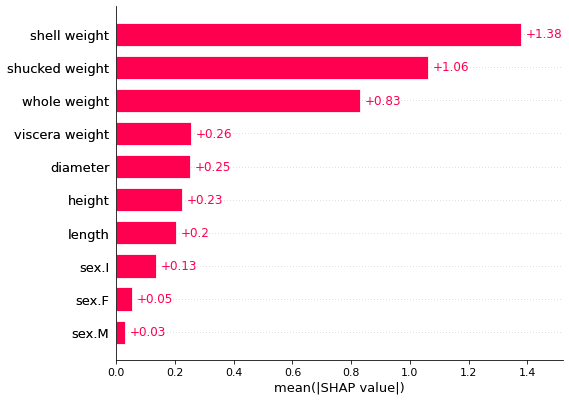

In [14]:
#Mean SHAP
shap.plots.bar(shap_values,show=False)

plt.savefig(path.format('mean_shap.png'),dpi=200,bbox_inches='tight', facecolor='white')

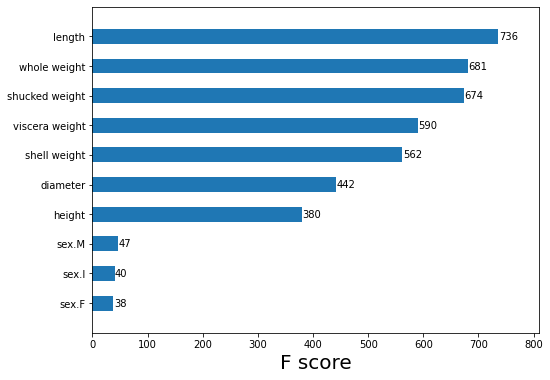

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))
plot_importance(model,ax=ax,grid=False,height=0.5)

plt.title('')
plt.ylabel('')
plt.xlabel('F score',size=20)

plt.savefig(path.format('Feature_importance.png'),dpi=200 ,bbox_inches='tight', facecolor='white')

## Decision Plot

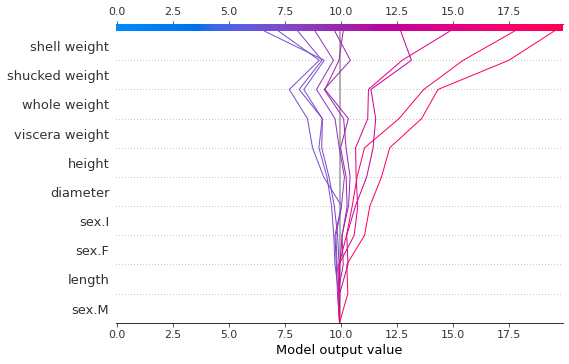

In [16]:
# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:10],feature_names=list(X.columns),show=False)

plt.savefig(path.format('decision_plot.png'),dpi=200,bbox_inches='tight', facecolor='white')

## Beeswarm

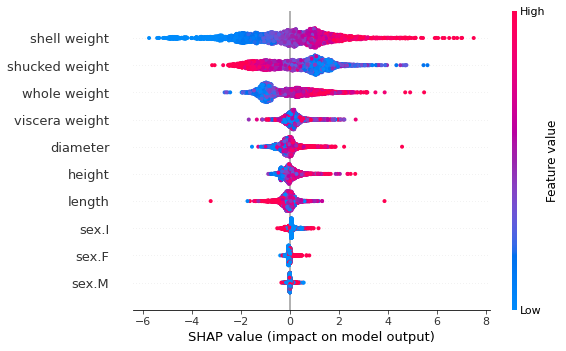

In [17]:
# Beeswarm plot
shap.plots.beeswarm(shap_values,show=False)

plt.savefig(path.format('beeswarm.png'),dpi=200,bbox_inches='tight', facecolor='white')

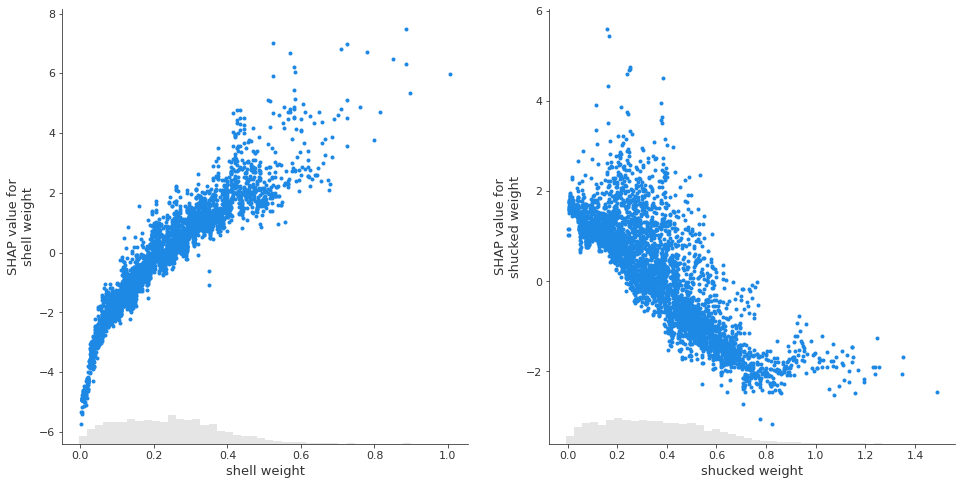

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,8))

shap.plots.scatter(shap_values[:,"shell weight"],ax=ax[0],show=False)
shap.plots.scatter(shap_values[:,"shucked weight"],ax=ax[1],show=False)

plt.savefig(path.format('shap_scatter.png'),dpi=200,bbox_inches='tight', facecolor='white')

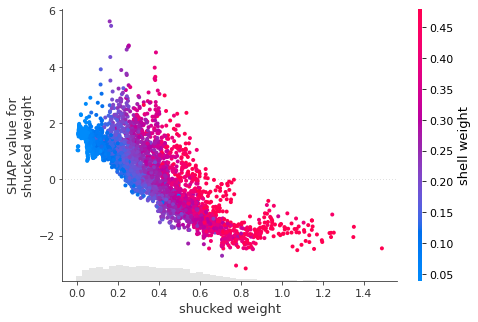

In [34]:
shap.plots.scatter(shap_values[:,"shucked weight"],color=shap_values[:,"shell weight"])

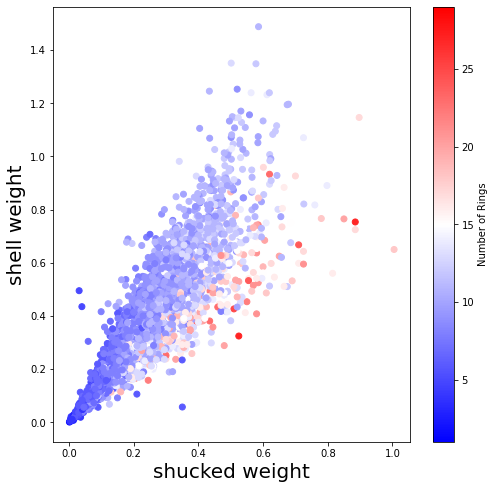

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(data["shell weight"],data["shucked weight"],c=data["rings"],cmap='bwr')
plt.colorbar(label="Number of Rings", orientation="vertical")

plt.xlabel('shucked weight',size=20)
plt.ylabel('shell weight',size=20)

plt.savefig(path.format('weight_interaction.png'),dpi=200,bbox_inches='tight', facecolor='white')

## Binary Target Variable

In [9]:
#Binary target varibale
y = [1 if y_>10 else 0 for y_ in y]

#Train model 
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X, y)

y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:06:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2683   47]
 [  95 1352]]


0.966004309312904

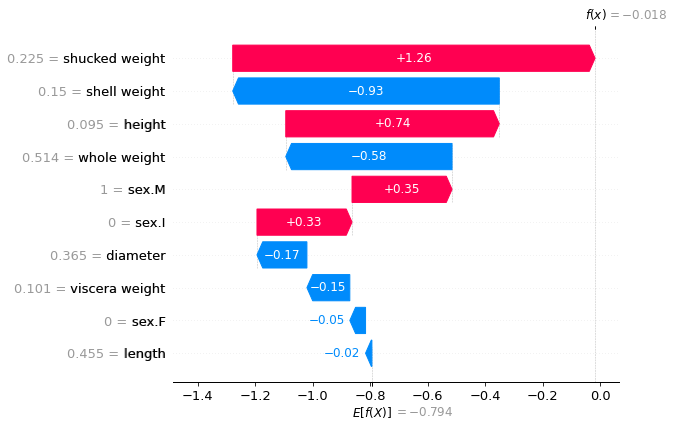

In [10]:
#Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [19]:
y_probs = model.predict_proba(X)
print(y_probs[0])
print(np.log(0.4954/(1-0.4954)))

[0.5045627  0.49543732]
-0.018400519151697995


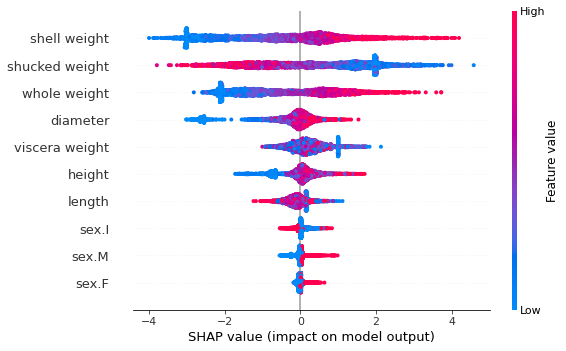

In [103]:
shap.plots.beeswarm(shap_values)